In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df_A = pd.read_csv(r'\Users\ASUS\Desktop\workspace\data-visualization/A.csv', index_col='Date')
del df_A['Adj Close']
del df_A['Volume']
df_A.head (5)

Open       High        Low      Close
Date                                                  
1999-11-18  32.546494  35.765381  28.612303  31.473534
1999-11-19  30.713520  30.758226  28.478184  28.880543
1999-11-22  29.551144  31.473534  28.657009  31.473534
1999-11-23  30.400572  31.205294  28.612303  28.612303
1999-11-24  28.701717  29.998211  28.612303  29.372318

In [51]:
df_A.index

Index(['1999-11-18', '1999-11-19', '1999-11-22', '1999-11-23', '1999-11-24',
       '1999-11-26', '1999-11-29', '1999-11-30', '1999-12-01', '1999-12-02',
       ...
       '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01'],
      dtype='object', name='Date', length=5124)

In [73]:
df_A.index = pd.to_datetime(df_A.index)
df_A_smaller = df_A.Close[-300:]

In [59]:
#df_A_smaller = df_A.Close[-200:]

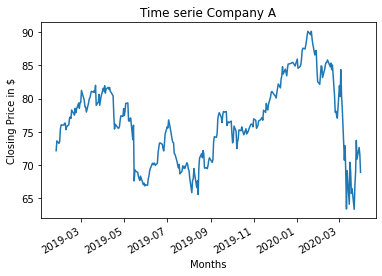

In [68]:
#Edata_A = plt.plot(df_A.Close[-100:])
# closing price of a stock of company A
A_close_values = df_A_smaller.plot() #color ='blue', fontsize =10
A_close_values.set_xlabel ('Months')
A_close_values.set_ylabel ('Closing Price in $')
plt.title('Timeserie Company A')
#plt.xticks(rotation=70)
plt.show()


In [46]:
df_B.index

DatetimeIndex(['1962-01-02', '1962-01-03', '1962-01-04', '1962-01-05',
               '1962-01-08', '1962-01-09', '1962-01-10', '1962-01-11',
               '1962-01-12', '1962-01-15',
               ...
               '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24',
               '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-30',
               '2020-03-31', '2020-04-01'],
              dtype='datetime64[ns]', name='Date', length=14663, freq=None)

In [35]:
df_B = pd.read_csv(r'\Users\ASUS\Desktop\workspace\data-visualization/AA.csv', index_col='Date')
del df_B['Adj Close']
del df_B['Volume']
df_B.head (5)

Open      High       Low     Close
Date                                              
1962-01-02  6.532155  6.556185  6.532155  6.532155
1962-01-03  6.532155  6.632280  6.524145  6.632280
1962-01-04  6.632280  6.664320  6.632280  6.632280
1962-01-05  6.632280  6.656310  6.616260  6.624270
1962-01-08  6.608250  6.608250  6.339915  6.408000

In [44]:
#df_B.index
#df_B.index = pd.to_datetime(df_B.index)

In [64]:
df_B.index = pd.to_datetime(df_B.index)
df_B_smaller = df_B.Close[-300:]

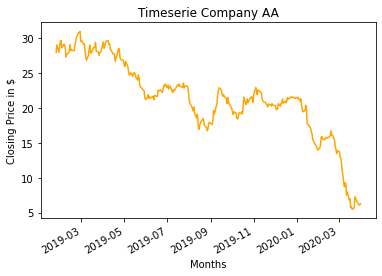

In [91]:
B_close_values = df_B_smaller.plot(color ='orange') #color ='blue', fontsize =10
B_close_values.set_xlabel ('Months')
B_close_values.set_ylabel ('Closing Price in $')
plt.title('Timeserie Company AA')
#plt.xticks(rotation=70)
plt.show ()

In [74]:
pct_A = np.log(df_A_smaller).diff ()
pct_A.head ()

Date
2019-01-24         NaN
2019-01-25    0.020161
2019-01-28   -0.005173
2019-01-29    0.003950
2019-01-30    0.025236
Name: Close, dtype: float64

In [75]:
pct_B = np.log(df_B_smaller).diff ()
pct_B.head ()

Date
2019-01-24         NaN
2019-01-25    0.037210
2019-01-28   -0.036495
2019-01-29    0.027148
2019-01-30    0.028799
Name: Close, dtype: float64

In [76]:
pct_A.dropna (inplace=True) #DELETING DE NAN
pct_B.dropna (inplace=True)

In [78]:
pct_A.head(10)


Date
2019-01-25    0.020161
2019-01-28   -0.005173
2019-01-29    0.003950
2019-01-30    0.025236
2019-01-31    0.008053
2019-02-01   -0.000132
2019-02-04   -0.000132
2019-02-05    0.003676
2019-02-06   -0.000131
2019-02-07   -0.012794
Name: Close, dtype: float64

In [80]:
pct_A.describe ()

count    299.000000
mean      -0.000155
std        0.021341
min       -0.116665
25%       -0.006374
50%        0.001582
75%        0.009279
max        0.093849
Name: Close, dtype: float64

In [81]:
pct_B.describe ()

count    299.000000
mean      -0.005011
std        0.038788
min       -0.236631
25%       -0.022028
50%       -0.003563
75%        0.014730
max        0.248567
Name: Close, dtype: float64

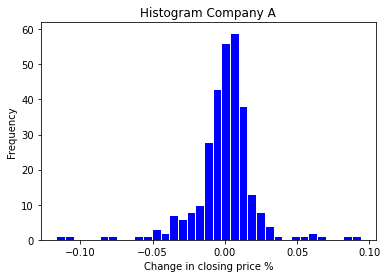

In [101]:
plt.hist(pct_A, bins=35, color = 'b', edgecolor='w')
plt.title('Histogram Company A')
plt.xlabel('Change in closing price %')
plt.ylabel('Frequency')
plt.show ()

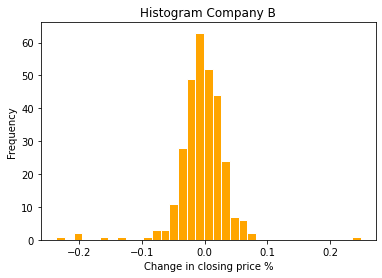

In [100]:
plt.hist(pct_B, bins=35, color = 'orange', edgecolor='w')
plt.title('Histogram Company B')
plt.xlabel('Change in closing price %')
plt.ylabel('Frequency')
plt.show ()

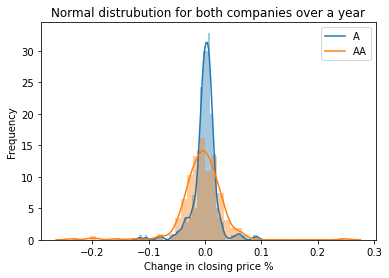

In [97]:
sns.distplot(pct_A, kde_kws={'label': 'A'})
sns.distplot(pct_B, kde_kws={'label': 'AA'})
plt.title('Normal distrubution for both companies over a year')
plt.xlabel('Change in closing price %')
plt.ylabel('Frequency')
plt.show ()

In [103]:
dfA_B = pd.merge(pct_A, pct_B, on='Date', how='left')
dfA_B.head (5)

Close_x   Close_y
Date                          
2019-01-25  0.020161  0.037210
2019-01-28 -0.005173 -0.036495
2019-01-29  0.003950  0.027148
2019-01-30  0.025236  0.028799
2019-01-31  0.008053  0.003037

In [106]:
Both = dfA_B.rename(columns = {'Close_x':'Company A','Close_y':'Company B'})
Both

Company A  Company B
Date                            
2019-01-25   0.020161   0.037210
2019-01-28  -0.005173  -0.036495
2019-01-29   0.003950   0.027148
2019-01-30   0.025236   0.028799
2019-01-31   0.008053   0.003037
...               ...        ...
2020-03-26   0.066168  -0.035898
2020-03-27  -0.038863  -0.043323
2020-03-30   0.024517  -0.076106
2020-03-31  -0.014554   0.014718
2020-04-01  -0.038428   0.014505

[299 rows x 2 columns]

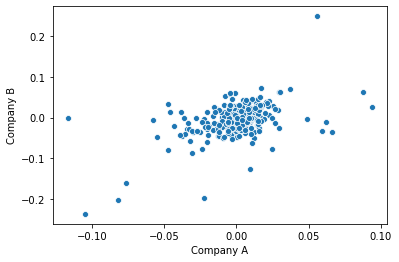

In [108]:
sns.scatterplot(Both['Company A'],Both['Company B'])

In [109]:
Both.corr()

Company A  Company B
Company A   1.000000   0.480741
Company B   0.480741   1.000000